In [18]:
# Attempt to reconstruct 3D antenna beam pattern by E and H-plane projections 
# by using a simple summing extrapolation function 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'zenith plane')

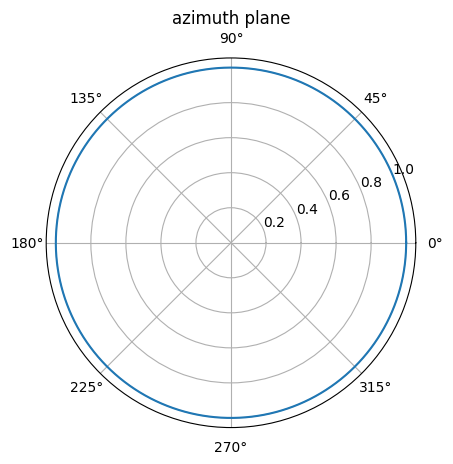

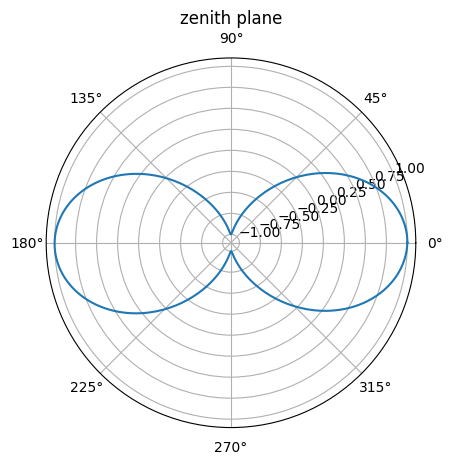

In [19]:
# https://demonstrations.wolfram.com/DipoleAntennaRadiationPattern/
# draw two orthogonal projections of dipole antenna 3D beam pattern  
# values of antenna gain are arbitary and has no physical meaning. 

num_of_point = 360
phi = np.linspace(0, 2* np.pi, num_of_point)

R_phi=np.ones(num_of_point)
    
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

plt.plot(np.linspace(0, 2* np.pi, num_of_point),R_phi)
plt.title('azimuth plane')

theta = np.linspace(0, np.pi, num_of_point)

R_theta=np.ones(num_of_point)

for theta in range(0, num_of_point):
        R_theta[theta]*=np.cos(2*np.pi*theta/(180))
        
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

plt.plot(np.linspace(0, 2* np.pi, num_of_point), R_theta)
plt.title('zenith plane')

We have two datasets R_phi[360] and R_phi[360] corresponding to antenna gains in azimuth and zenith planes  $G_{\phi}$ and $G_{\theta}$. We want to build $G_{total}(\phi,\theta)$ for $\phi$ and $\theta$ covering the whole 4$\pi$. 

We will be using the folliwing extrapolation formula:
 $G_{total}(\phi,\theta) = \frac{ G_{\phi}(\phi) + G_{\theta}(\theta)}{2} $


In [23]:
theta, phi = np.linspace(0, 2*np.pi, num_of_point), np.linspace(0, 2*np.pi, num_of_point)
R = np.ones(len(theta))

THETA, PHI = np.meshgrid(theta, phi)

R=np.zeros((num_of_point, num_of_point))

for phi in range(0,360):
    for theta in range(0,360):    
        R[phi][theta]=(R_theta[theta] + R_phi[phi])/2 

Text(0.5, 0.92, 'Interpolated beam pattern in 3D, simple summing algorithm ')

<Figure size 2000x1800 with 0 Axes>

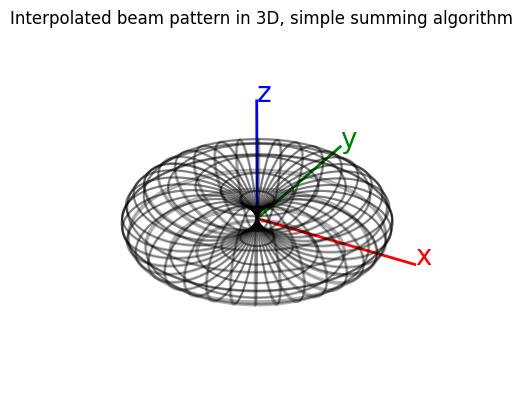

In [42]:
# switch to cartezian coordinates from zenith and azimuth and plot the resulting gain pattern 
X = R * np.cos(THETA) * np.cos(-PHI)
Y = R * np.cos(THETA) *  np.sin(-PHI)
Z = R * np.sin(THETA)

fig = plt.figure(figsize=(20,18))
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.set_axis_off()

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, alpha=0.3, color = 'black')

N = np.sqrt(X**2 + Y**2 + Z**2)
Rmax = np.max(N)
N = N/(Rmax)

axes_length = 1.3
ax.plot([0, axes_length*Rmax], [0, 0], [0, 0], linewidth=2, color='red')
ax.text(axes_length*Rmax,0,0,'x', size=20, zorder=1, color='red') 

ax.plot([0, 0], [0, axes_length*Rmax], [0, 0], linewidth=2, color='green')
ax.text(0,axes_length*Rmax,0,'y', size=20, zorder=1, color='green') 
ax.plot([0, 0], [0, 0], [0, axes_length*Rmax], linewidth=2, color='blue')
ax.text(0,0,axes_length*Rmax,'z', size=20, zorder=1, color='blue') 

ax.set_xlim(-3*axes_length*Rmax/5, 3.5*axes_length*Rmax/5)
ax.set_ylim(-3*axes_length*Rmax/5, 3.5*axes_length*Rmax/5)
ax.set_zlim(-3*axes_length*Rmax/5, 3.5*axes_length*Rmax/5)

plt.title('Interpolated beam pattern in 3D, simple summing algorithm ')
plt.show()



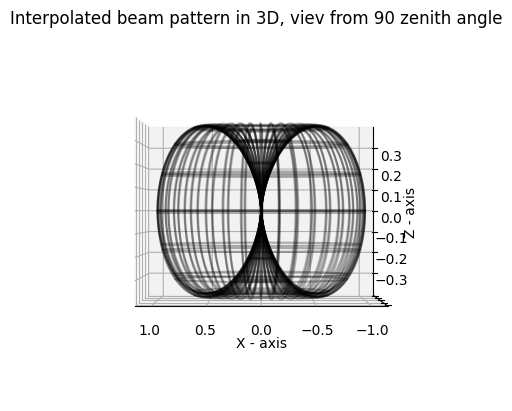

In [69]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, alpha=0.3, color = 'black')

ax.view_init(0,90) # changes viewing angle 

plt.title('Interpolated beam pattern in 3D, viev from 90 zenith angle' )
ax.set_xlabel(r'X - axis', )
ax.set_zlabel(r'Z - axis')
ax.yaxis.set_ticklabels([])

plt.show()